<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/K_MeansClustering_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Solve the K_Means of M.L using the given dataset driver_data.csv
* As this is clustering algorithm it does not contain target variable. You have to form the clusters using k-means algorithm.
* When the data is partitioned into clusters and you get additional new column. Convert that dataframe to new .csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dataset-43-1-driver-data.csv')
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [ ]:
df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(df)
scaled_df

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

##Training model on data

In [ ]:
from sklearn.cluster import KMeans
ssq = []

for K in range(1,11):
  mod = KMeans(n_clusters=K, random_state=123)

  result = mod.fit(scaled_df)
  ssq.append(mod.inertia_)

###Finding appropriate no. of clusters

Text(0.5, 1.0, 'SSQ Plot')

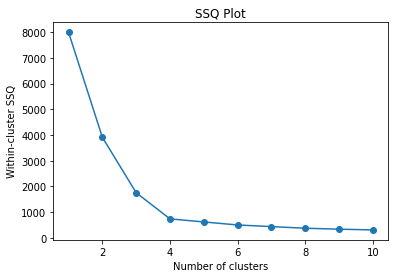

In [ ]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSQ')
plt.title('SSQ Plot')

In [ ]:
# Taking custer value = 4
mod = KMeans(n_clusters=4, random_state=123)

result = mod.fit(scaled_df)

In [ ]:
predictions = result.predict(scaled_df)
predictions[:5]

array([2, 2, 2, 2, 2], dtype=int32)

##Plotting clusters of data with centroids

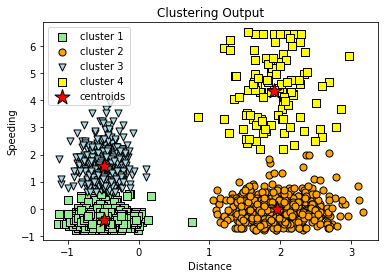

In [ ]:
plt.scatter(scaled_df[predictions==0,0], scaled_df[predictions==0,1], 
            s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')
plt.scatter(scaled_df[predictions==1,0], scaled_df[predictions==1,1], 
            s=50, c='orange', marker='o', edgecolors='black', label='cluster 2')
plt.scatter(scaled_df[predictions==2,0], scaled_df[predictions==2,1], 
            s=50, c='lightblue', marker='v', edgecolors='black', label='cluster 3')
plt.scatter(scaled_df[predictions==3,0], scaled_df[predictions==3,1], 
            s=50, c='yellow', marker='s', edgecolors='black', label='cluster 4')

plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], 
            s=250, c='red', marker='*', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1) 
plt.xlabel('Distance') 
plt.ylabel('Speeding') 
plt.title('Clustering Output')
plt.show()

##Deploying model and saving to new .csv file

In [ ]:
predictions_relabelled = np.where(predictions==0, 'A', np.where(predictions==1, 'B', 
                                                                np.where(predictions==2, 'C','D')))
predictions_relabelled = pd.DataFrame(predictions_relabelled)

df.loc[:,'category'] = predictions_relabelled.values
df.index.name = 'Number'

df.head()

,Distance_Feature,Speeding_Feature,category
Number,,,
0,71.24,28,C
1,52.53,25,C
2,64.54,27,C
3,55.69,22,C
4,54.58,25,C


In [ ]:
df.tail()

,Distance_Feature,Speeding_Feature,category
Number,,,
3995,160.04,10,B
3996,176.17,5,B
3997,170.91,12,B
3998,176.14,5,B
3999,168.03,9,B


In [ ]:
df.to_csv('driver_seg_output.csv', index=False)